<a href="https://colab.research.google.com/github/ykim879/whats.todays.trend/blob/master/news_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Analyzer

In [11]:
import requests
import pandas as pd

In [12]:
key = '5e74c7cf9e344e3e8c04210f9b75125b'
response = requests.get('https://newsapi.org/v2/sources?'
			   'language=en&country=us&'
			   'apiKey=' + key)
sources = response.json()['sources']
df = pd.DataFrame();
pd.set_option('display.max_columns', 7)
for source in sources:
  row = pd.Series(source)
  df = df.append(row, ignore_index = True)
df.set_index("name", inplace = True)

In [13]:
print(df)

                                category country  \
name                                               
ABC News                         general      us   
Al Jazeera English               general      us   
Ars Technica                  technology      us   
Associated Press                 general      us   
Axios                            general      us   
Bleacher Report                   sports      us   
Bloomberg                       business      us   
Breitbart News                   general      us   
Business Insider                business      us   
Buzzfeed                   entertainment      us   
CBS News                         general      us   
CNN                              general      us   
Crypto Coins News             technology      us   
Engadget                      technology      us   
Entertainment Weekly       entertainment      us   
ESPN                              sports      us   
ESPN Cric Info                    sports      us   
Fortune     

## Method: eachNewsHeadlines
### collects each 55 news headline

In [14]:
import queue
import threading
def eachNewsHeadlines(ID, q):
	response = requests.get('https://newsapi.org/v2/top-headlines?sources=' + ID + '&apiKey=' + key)
	json = response.json()
	if json['status'] != 'ok':
		raise IOError('API key is probably overused :(')
	topNews = []
	topNews.append(ID)
	for elem in json['articles']:
		topNews.append(elem['title'])
	q.put(topNews)

In [15]:
threads = []
q = queue.Queue()
for id in df['id']:
  t = threading.Thread(target = eachNewsHeadlines, args = (id, q))
  threads.append(t)
  t.start()
for t in threads:
  t.join()

headlines = []
while not q.empty():
  headlines.append(q.get())
#for id in df['id']:
#  headlines.append(eachNewsHeadlines(id))
print(headlines)

[['ars-technica', 'It’s the peak of the Atlantic hurricane season, and the tropics are bonkers', 'Immortals hands-on: I guess Ubisoft is copying Breath of the Wild now', 'Revisiting the spectacular failure that was the Bill Gates deposition', 'New gravitational-lensing study hints at problems for dark matter models', 'AT&T hopes you’ll forget its years-long fight against accurate broadband maps', 'Microsoft’s first Android phone, the Surface Duo, is now available', 'Motorola’s Razr 2 hopes to right the wrongs of the original Razr reboot', 'As waters warm, these species are stuck going the wrong way', 'Maserati’s new MC20 supercar uses F1 engine efficiency technology', 'Console options without disc drives could be GameStop’s final death knell'], ['axios', 'Axios Pro Rata: Silicon Valley&#x27;s Veep — AirIPO — Brooks Brothers lives', 'The busiest owner in sports', 'GOP congressman condemns QAnon after conspiracy theorist wins Georgia runoff', 'House Oversight chair introduces bill to pre

## Method: parseWords
### this will parse the headlines to count how many times each vocabs appears in headlines

In [16]:
import re

In [17]:
def parseWords(headlines, dic):
  for headline in headlines:
    for line in headline[1:]:
      vocabs = re.split('\W+', line)
      for vocab in vocabs:
        if vocab in dic:
          dic[vocab] += 1
        else:
          dic[vocab] = 1

In [19]:
parseVocab = {}
parseWords(headlines, parseVocab)
print(parseVocab)

{'It': 15, 's': 102, 'the': 97, 'peak': 1, 'of': 74, 'Atlantic': 1, 'hurricane': 1, 'season': 3, 'and': 53, 'tropics': 1, 'are': 13, 'bonkers': 1, 'Immortals': 2, 'hands': 2, 'on': 36, 'I': 9, 'guess': 1, 'Ubisoft': 9, 'is': 32, 'copying': 1, 'Breath': 2, 'Wild': 3, 'now': 8, 'Revisiting': 1, 'spectacular': 1, 'failure': 1, 'that': 11, 'was': 7, 'Bill': 2, 'Gates': 1, 'deposition': 1, 'New': 16, 'gravitational': 1, 'lensing': 1, 'study': 2, 'hints': 1, 'at': 11, 'problems': 1, 'for': 41, 'dark': 1, 'matter': 2, 'models': 1, 'AT': 1, 'T': 2, 'hopes': 4, 'you': 7, 'll': 1, 'forget': 1, 'its': 6, 'years': 4, 'long': 5, 'fight': 5, 'against': 8, 'accurate': 1, 'broadband': 2, 'maps': 1, 'Microsoft': 9, 'first': 8, 'Android': 3, 'phone': 1, 'Surface': 3, 'Duo': 3, 'available': 2, 'Motorola': 1, 'Razr': 2, '2': 3, 'to': 126, 'right': 3, 'wrongs': 1, 'original': 1, 'reboot': 1, 'As': 5, 'waters': 1, 'warm': 1, 'these': 2, 'species': 1, 'stuck': 1, 'going': 2, 'wrong': 1, 'way': 2, 'Maserati':

##parsed data into DataFrame



In [20]:
keyword = list(parseVocab.keys())
occurancy = list(parseVocab.values())

In [21]:
dict_for_words = {
    'keywords': keyword,
    'occurancy': occurancy
}

In [22]:
topWords = pd.DataFrame(dict_for_words)
topWords.set_index('keywords', inplace = True)
topWords.sort_values(by = 'occurancy',ascending= False)

,occurancy
keywords,
to,126
s,102
the,97
in,78
of,74
...,...
Mahela,1
Warnie,1
KP,1


##Eliminates unnecessary data

In [23]:
eliminated = ["to", "s", "the", "in"]
for elimination in eliminated:
  topWords.drop(index = elimination)

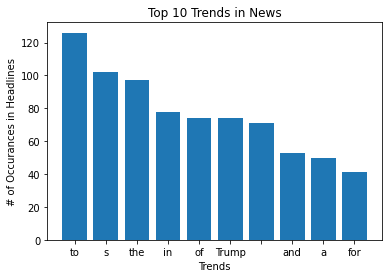

In [24]:

import matplotlib.pyplot as plt
top10Words = sorted(parseVocab, key = lambda x: parseVocab[x], reverse = True)[:10]
top10Occur = [parseVocab[x] for x in top10Words]
plt.bar(top10Words, top10Occur)
plt.title('Top 10 Trends in News')
plt.ylabel('# of Occurances in Headlines')
plt.xlabel('Trends')
plt.show()